# Neurons

Within **Neural Networks**, the concept of a neuron is based on the biological neuron cell which has dendrites on one end which recieve input and an axon terminus which fires an output response and communicates that response with downstream cells.

<img src='assets/Neuron 1.PNG'>

Neural networks have revolutionised modern machine learning and allow for complex relationships in large datasets to be discovered and modelled. In machine learning, a Neuron has 3 distinct parts:

- Inputs
-- The inputs are the values which are fed into the Neuron

- Weights
-- The weights are a representation of the computation that the neuron does on the input values, these are the values which are trained when the machine learns.

- Biases
-- Biases act as a verticle scaling value, these modify the degree to which certain neurons and weights are considered. These are also modified during machine learning.

In [7]:
# A simple neuron can be coded in python like this:

inputs = [1, 2, 3, 4]

weights = [0.5, 0.8, -0.2, 0.85]

biases = 2

# the values are then calculated forward to generate the output value from the first neuron.

output = (inputs[0] * weights[0] +
        inputs[1] * weights[1] + 
        inputs[2] * weights[2] + 
        inputs[3] * weights[3] + biases)

output

6.9

In [19]:
# to add more neurons we can expand the above code

inputs = [1, 2, 3, 4]

weights1 = [0.5, 0.8, -0.2, 0.85]
weights2 = [0.22, 0.14, 0.82, 0.25]
weights3 = [-0.5, 0.27, -0.17, 0.23]

bias1 = 2
bias2 = 2
bias3 = 0.6

outputs = [
    inputs[0] * weights1[0] + 
    inputs[1] * weights1[1] + 
    inputs[2] * weights1[2] + 
    inputs[3] * weights1[3] + bias1,

    inputs[0] * weights2[0] + 
    inputs[1] * weights2[1] + 
    inputs[2] * weights2[2] + 
    inputs[3] * weights2[3] + bias2,

    inputs[0] * weights3[0] + 
    inputs[1] * weights3[1] + 
    inputs[2] * weights3[2] + 
    inputs[3] * weights3[3] + bias3,
]

outputs

# we are now presented with 3 outputs, one for each of our neurons. This is what is known as a fully connected layer, although this is common, it is not a requirement that all inputs are connected to all neurons. The concept of Dropout which prevents overfitting is a method by which a random neuron will be turned off for a training cycle and will not be used to train. 

[6.9, 5.96, 1.05]

In [20]:
# There is a much better way to write this calculation. 

inputs = [1, 2, 3, 4]

weights = [
            [0.5, 0.8, -0.2, 0.85],
            [0.22, 0.14, 0.82, 0.25],
            [-0.5, 0.27, -0.17, 0.23]
            ]

biases = [2, 2, 0.6]

layer_outputs = []

for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0

    for n_input, weight in zip(inputs, neuron_weights):

        neuron_output += n_input*weight
    neuron_output += neuron_bias

    layer_outputs.append(neuron_output)

layer_outputs

[6.9, 5.96, 1.05]

## Dot Product

In the above examples, the calculation which was taking place is something known as the **dot product**. This means that we take the (n)th element from one array and multiply it with the corresponding element from another array.

This can be represented mathematically as:

<img src='assets/Dot Product.PNG'>

There is a function in numpy which will do this for us called *<a href="https://numpy.org/doc/stable/reference/generated/numpy.dot.html">np.dot()</a>* we can now re-write the above much more simply with numpy

In [2]:
import numpy as np

inputs = [1, 2, 3, 4] # we could also turn these into numpy arrays with np.array()

weights = [
            [0.5, 0.8, -0.2, 0.85],
            [0.22, 0.14, 0.82, 0.25],
            [-0.5, 0.27, -0.17, 0.23]
            ]

biases = [2, 2, 0.6]

outputs = np.dot(weights, inputs) + biases

outputs

array([6.9 , 5.96, 1.05])

## Batches

Practically when training neural networks, input data is divided up into batches and fed into the network, this is done to reduce memory overhead, as it allows for parallelisation and also because if we trained the forward and backward pass operations for each datapoint one at a time, the network would not generalise well and would overfit to each datapoint. 

The size of batches becomes a common **hyperparameter** which is tuned when **Neural Networks** are created.

## Matrix Product

This presents a problem though, we want to be able to carry out the calculations on the batches of data quickly in order to do this we use a matrix product, this is essentially a dot product against all combinations of the rows from the first (input) matrix and the columns from the second (weights) matrix, this results in an output matrix which has holds the values for these computations. The second (weights) matrix is also transposed to allow for this to work, you can transpose any numpy array by using *<a href="https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html">np.T</a>*

<img src="assets/Matrix Product.PNG">

there is also a useful visualisation of this process *<a href="https://nnfs.io/jei">here</a>*


In [3]:
inputs = [
        [1, 2, 3, 4],
         [2, 5, -0.4, 3.1],
         [-1.5, 2.7, 3.3, -0.8]
         ]

weights  = [
            [0.5, 0.8, -0.2, 0.85],
            [0.22, 0.14, 0.82, 0.25],
            [-0.5, 0.27, -0.17, 0.23]
            ]

biases =  [2, 2, 0.6]

outputs = np.dot(inputs, np.array(weights).T) + biases

outputs

array([[6.9  , 5.96 , 1.05 ],
       [9.715, 3.587, 1.731],
       [2.07 , 4.554, 1.334]])

## Layers

Our current network functions but it currently only has one layer, in order to model complex relationships usually more layers are added, a neural network can be categorised as **deep** when it has more than two layers of neurons. Layers will often be referred to as **Hidden Layers**, this does not mean that you cannot see what is going on here but it is more accurate that as networks grow, it becomes impractical for people to understand how the weights and biases of a given neuron represent the model in the real world.

We will now add a second layer to our network

In [5]:
inputs = [
        [1, 2, 3, 4],
         [2, 5, -0.4, 3.1],
         [-1.5, 2.7, 3.3, -0.8]
         ]

weights  = [
            [0.5, 0.8, -0.2, 0.85],
            [0.22, 0.14, 0.82, 0.25],
            [-0.5, 0.27, -0.17, 0.23]
            ]

biases =  [2, 2, 0.6]

weights2  = [
            [0.15,  -0.22, 0.55],
            [-0.53, -0.82, 0.25],
            [0.15, 0.21, -0.93]
            ]

biases2 =  [0.7, 1.1, 0.95]


l1_outputs = np.dot(inputs, np.array(weights).T) + biases # Inputs (3,4)

l2_outputs = np.dot(l1_outputs, np.array(weights2).T) + biases2 # Inputs (3,3)

l2_outputs # (3,3)

# Here we go from an input matrix of (3,4), this is then fed into 3 neurons, this outputs a (3,3) matrix, which is then fed into the next neuron which finally outputs a (3,3) matrix


array([[ 1.0013 , -7.1817 ,  2.2601 ],
       [ 2.32016, -6.55754,  1.55069],
       [ 0.74232, -3.39788,  0.97622]])

## Training Data

Knowing the structure and understanding your data is an important fascet to machine learning. In most cases, more simple techniques such as Decision Trees, SVM and even Naive Bayes can be effective at modelling the data. There are scenarios where modelling relationships becomes quite difficult, below we will import a library to create some test data which has a spiral pattern and is difficult for the above techniques to successfully model. 

It would now also be useful to set up some classess to represent our layers instead of having to hand-type everything each time.

we will also be using a few more functions from within numpy <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html">np.random.randn()</a> and <a href="https://numpy.org/doc/stable/reference/generated/numpy.zeros.html">np.zeros()</a>

In [17]:
# Dense layer setup

class LayerDense:

    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, x):
        self.output = np.dot(x, self.weights) + self.biases

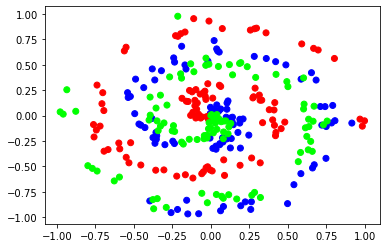

In [13]:
from nnfs.datasets import spiral_data
import nnfs
import matplotlib.pyplot as plt

X, y = spiral_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

In [18]:
# We can now use our Dense layer on our test data

X, y = spiral_data(samples=100, classes=3)

dense1 = LayerDense(2, 3) # X our training data is of shape (n, 2) there are two columns with values in them, there are also 3 neurons in our dense layer - hence (2, 3)

dense1.forward(X)

dense1.output[:5] # Display the first 5 results from our 3 neurons

# Our network is now outputting the results from the first 5 input values. 

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.50414508e-05, 1.70285281e-04, 2.21550748e-04],
       [1.68863068e-04, 3.00772944e-04, 3.61080818e-04],
       [2.39850000e-04, 5.44771752e-04, 7.60997160e-04],
       [2.91776681e-04, 7.26592353e-04, 1.06057634e-03]])

## Activation Functions

Our network currently functions but it is missing a piece, the next thing we need to add are activation functions. Activation Fucntions are important as they allow our network to approximate functions which are non-linear. In general there are two classes of activation functions, those which are applied to our hidden layers and those which are applied to our outputs.

### Step Function

Originally concieved to simulate a neuron either firing or not, these are rarely used in modern networks and are replaced by ReLU (Rectified Linear Activation Function (UNIT))

<img src="assets/Step Function.PNG">

### Linear Function

this activation function is usually applied to the last layer of a network which is trying to carry our regression (estimating a scalar value) it is literally y = x. 

<img src="assets/Linear Function.PNG">

### Sigmoid Function

Sigmoid activation functions were originally used in favour of Step Functions as they scale better for neural networks and provided better results however calculating the sigmoid function is more expensive than the now in favour ReLU function and ReLU has provided better results when used in hidden layers. That being said, sigmoid activation functions are still used on output layers of classification tasks.

<img src="assets/Sigmoid Function.PNG">

### ReLU Function

Rectified Linear Unit (ReLU) is now the most common activation function used in neural networks, it is essentially a linear funciton clipped at 0, this has the effect of simulating either the neuron firing or and keeping within a useful scale for machine learning. It is also extremely easy to compute and allows for larger networks to be built. 

<img src="assets/ReLU Function.PNG">